In [1]:
%load_ext autoreload
%reload_ext autoreload
%autoreload 2
%aimport
%matplotlib inline

Modules to reload:
all-except-skipped

Modules to skip:



# Examples for the Dynamic Solow Model

This relates to the paper: "Capital Demand Driven Business Cycles: Mechanism and Effects" by Naumann-Woleske et al. 2021.

Import some basic functions to manipulate our outputs

In [2]:
from matplotlib import pyplot as plt
from matplotlib import rc

import pandas as pd
import numpy as np

In [3]:
import demandSolow as ds
import solowModel as sm

## The General Case

Choose the default parameters for the model and the noise setup, as shown in the paper:

In [4]:
parameters = dict(rho=0.33, epsilon=2.5e-5, tau_y=1e3, dep=2e-4,
              tau_h=25, tau_s=250, c1=3, c2=7e-4, beta1=1.1,
              beta2=1.0, gamma=2000, saving0=0.15, h_h=10)

In [5]:
noise = dict(decay=0.2, diffusion=1.0)

In [6]:
general_model = sm.SolowModel(parameters, noise)

Set the starting values of the model to be in the capital supply regime. Note the order of the starting values is 
[y, ks, kd, s, h, switch, xi]

In [7]:
start = np.array([1, 10, 9, 0, 0, 1, 0])
start[0] = 1e-5 + (min(start[1:3]) / 3)

Simulate a path for the general Solow Model

In [8]:
path = general_model.simulate(start, t_end=1e7, seed=0)

Visualise some of the output dynamics, in particular the production, capital demand and supply, and the sentiment

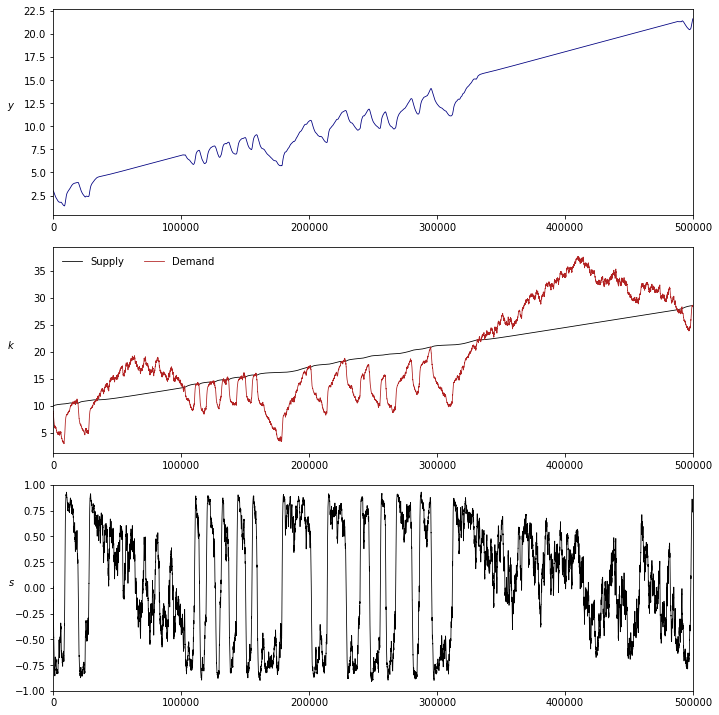

In [9]:
fig = plt.figure(figsize=(10,10))

# Which periods to show
start = 0
end = 5e5

# Set up the axes
ax_s = fig.add_subplot(3, 1, 3)
ax_y = fig.add_subplot(3, 1, 1, sharex=ax_s)
ax_k = fig.add_subplot(3, 1, 2, sharex=ax_s)

# Production
ax_y.plot(path.y.loc[start:end], color='navy', linewidth=0.8)
ax_y.set_ylabel(r'$y$', rotation=0)

# Capital Timeseries
ax_k.plot(path.ks.loc[start:end], label=r'Supply', color='black', linewidth=0.8)
ax_k.plot(path.kd.loc[start:end], label=r'Demand', color='firebrick', linewidth=0.8)
ax_k.legend(frameon=False, loc='upper left', ncol=2, bbox_to_anchor=(0, 1.0))
ax_k.set_ylabel(r'$k$', rotation=0)

# Sentiment timeseries
ax_s.plot(path.s.loc[start:end], color='black', linewidth=0.8)
ax_s.set_ylabel(r'$s$', rotation=0)
ax_s.set_ylim(-1, 1)

# Formatting
ax_s.set_xlim(start, end)
fig.align_ylabels()
fig.tight_layout()

One can then also analyse the distribution of the sentiment to show the bistability of the sentiment dependent on the different regimes. In particular in the demand regimes it is strongly bistable with two wells, in the supply case it retains a positive peak (needed to get to supply limit) but becomes centered around 0.

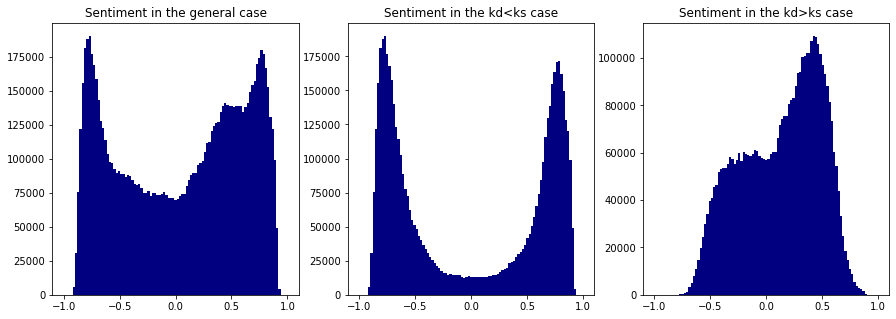

In [10]:
fig, ax = plt.subplots(ncols=3, figsize=(15,5))
bins = np.linspace(-1.0, 1.0, 100)
ax[0].hist(path.s, bins=bins, color='navy')
ax[0].set_title("Sentiment in the general case")

ax[1].hist(path.s.loc[path.kd<path.ks], bins=bins, color='navy')
ax[1].set_title("Sentiment in the kd<ks case")

ax[2].hist(path.s.loc[path.kd>=path.ks], bins=bins, color='navy')
ax[2].set_title("Sentiment in the kd>ks case")
plt.show()